## Import Modules

In [4]:
from tvDatafeed import TvDatafeed, Interval
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from function import get_number_of_days

## Login credentials on tradingview

In [5]:
username = 'rheyhantensor'
password = '$Acong091283'
tv = TvDatafeed(username, password)

## Start Scrapping!

In [6]:
data=tv.get_hist(symbol='BBCA',exchange='IDX', interval=Interval.in_daily, n_bars=10000000).iloc[:,1]
data=data[data.index.year >= 2013]

#### Without change

In [7]:
data
#save data to csv
#data.to_csv("../DATA/data_ori.csv")

datetime
2013-01-02 09:00:00    1820.0
2013-01-03 09:00:00    1830.0
2013-01-04 09:00:00    1840.0
2013-01-07 09:00:00    1810.0
2013-01-08 09:00:00    1840.0
                        ...  
2024-01-18 09:00:00    9675.0
2024-01-19 09:00:00    9775.0
2024-01-22 09:00:00    9600.0
2024-01-23 09:00:00    9450.0
2024-01-24 09:00:00    9600.0
Name: open, Length: 2690, dtype: float64

### Handling!

In [8]:
#Get data only from 1st january 2013 to 1st january 2024

temp=[]
for i in range(2013, 2025):
    a=data[data.index.year==i]
    for j in range(1, 13):
        c=a[a.index.month==j]
        day_tot=get_number_of_days(i, j)
        for k in range(1, day_tot+1):
            try:
                b=c[c.index.day==k][0]
                temp.append([f'{i}-{j:02}-{k:02}', b])
            except:
                temp.append([f'{i}-{j:02}-{k:02}',  "None!"])
temp=np.array(temp)
df=pd.DataFrame(temp[:np.where(temp[:,0]=="2024-01-02")[0][0]], columns=["Date", "Open"]).replace("None!", np.nan)
df["Open"]=df["Open"].astype("float")

In [107]:
df["Open"].isna().sum()         #Missing value (1345)
df.shape[0]                    #Total observation (4018)

df["Open"].notna().sum()       ##observation not missing value

2673

In [108]:
#save data with missing value to csv
df.to_csv("../DATA/data_ori_missvalue.csv")

#### Last Observation Carried Forward(LOCF)

In [9]:
df_bfill=df.copy()
df_bfill['Open']= df_bfill['Open'].fillna(method ='bfill')

df_bfill.index=pd.to_datetime(df["Date"])
df_bfill=df_bfill.pop("Open")

In [10]:
df_bfill

Date
2013-01-01    1820.0
2013-01-02    1820.0
2013-01-03    1830.0
2013-01-04    1840.0
2013-01-05    1810.0
               ...  
2023-12-28    9325.0
2023-12-29    9425.0
2023-12-30       NaN
2023-12-31       NaN
2024-01-01       NaN
Name: Open, Length: 4018, dtype: float64

#### Next Observation Carried Backward(NOCB)

In [11]:
df_ffill=df.copy()
df_ffill['Open']= df_ffill['Open'].fillna(method ='ffill')

df_ffill.index=pd.to_datetime(df["Date"])
df_ffill=df_ffill.pop("Open")

In [12]:
df_ffill

Date
2013-01-01       NaN
2013-01-02    1820.0
2013-01-03    1830.0
2013-01-04    1840.0
2013-01-05    1840.0
               ...  
2023-12-28    9325.0
2023-12-29    9425.0
2023-12-30    9425.0
2023-12-31    9425.0
2024-01-01    9425.0
Name: Open, Length: 4018, dtype: float64

#### Mean imputation

In [13]:
df_meanimpt=df.copy()

df_meanimpt["Open"]=df_meanimpt["Open"].fillna(df_meanimpt["Open"].mean())

df_meanimpt.index=pd.to_datetime(df["Date"])
df_meanimpt=df_meanimpt.pop("Open")

In [14]:
df_meanimpt

Date
2013-01-01    4884.319117
2013-01-02    1820.000000
2013-01-03    1830.000000
2013-01-04    1840.000000
2013-01-05    4884.319117
                 ...     
2023-12-28    9325.000000
2023-12-29    9425.000000
2023-12-30    4884.319117
2023-12-31    4884.319117
2024-01-01    4884.319117
Name: Open, Length: 4018, dtype: float64

#### Median imputation

In [15]:
df_medimpt=df.copy()

df_medimpt["Open"]=df_medimpt["Open"].fillna(df_medimpt["Open"].median())

df_medimpt.index=pd.to_datetime(df_medimpt["Date"])
df_medimpt=df_medimpt.pop("Open")

In [16]:
df_medimpt

Date
2013-01-01    4680.0
2013-01-02    1820.0
2013-01-03    1830.0
2013-01-04    1840.0
2013-01-05    4680.0
               ...  
2023-12-28    9325.0
2023-12-29    9425.0
2023-12-30    4680.0
2023-12-31    4680.0
2024-01-01    4680.0
Name: Open, Length: 4018, dtype: float64

#### Linear Interpolation

In [17]:
df_linear=df.copy()
df_linear['Open']=df_linear['Open'].interpolate(option='linear')

df_linear.index=pd.to_datetime(df_linear["Date"])
df_linear=df_linear.pop("Open")

In [18]:
df_linear

Date
2013-01-01       NaN
2013-01-02    1820.0
2013-01-03    1830.0
2013-01-04    1840.0
2013-01-05    1830.0
               ...  
2023-12-28    9325.0
2023-12-29    9425.0
2023-12-30    9425.0
2023-12-31    9425.0
2024-01-01    9425.0
Name: Open, Length: 4018, dtype: float64

#### Spline Interpolation

In [87]:
df_spline=df["Open"].copy()
df_spline=df_spline.interpolate(method='spline', order=1)
df_spline=pd.DataFrame(df_spline)
df_spline.index=pd.to_datetime(df["Date"])
df_spline=df_spline["Open"]

In [88]:
df_spline

Date
2013-01-01            NaN
2013-01-02    1820.000000
2013-01-03    1830.000000
2013-01-04    1840.000000
2013-01-05    1830.010758
                 ...     
2023-12-28    9325.000000
2023-12-29    9425.000000
2023-12-30    9524.410311
2023-12-31    9623.952671
2024-01-01    9723.495030
Name: Open, Length: 4018, dtype: float64

# Comparison!

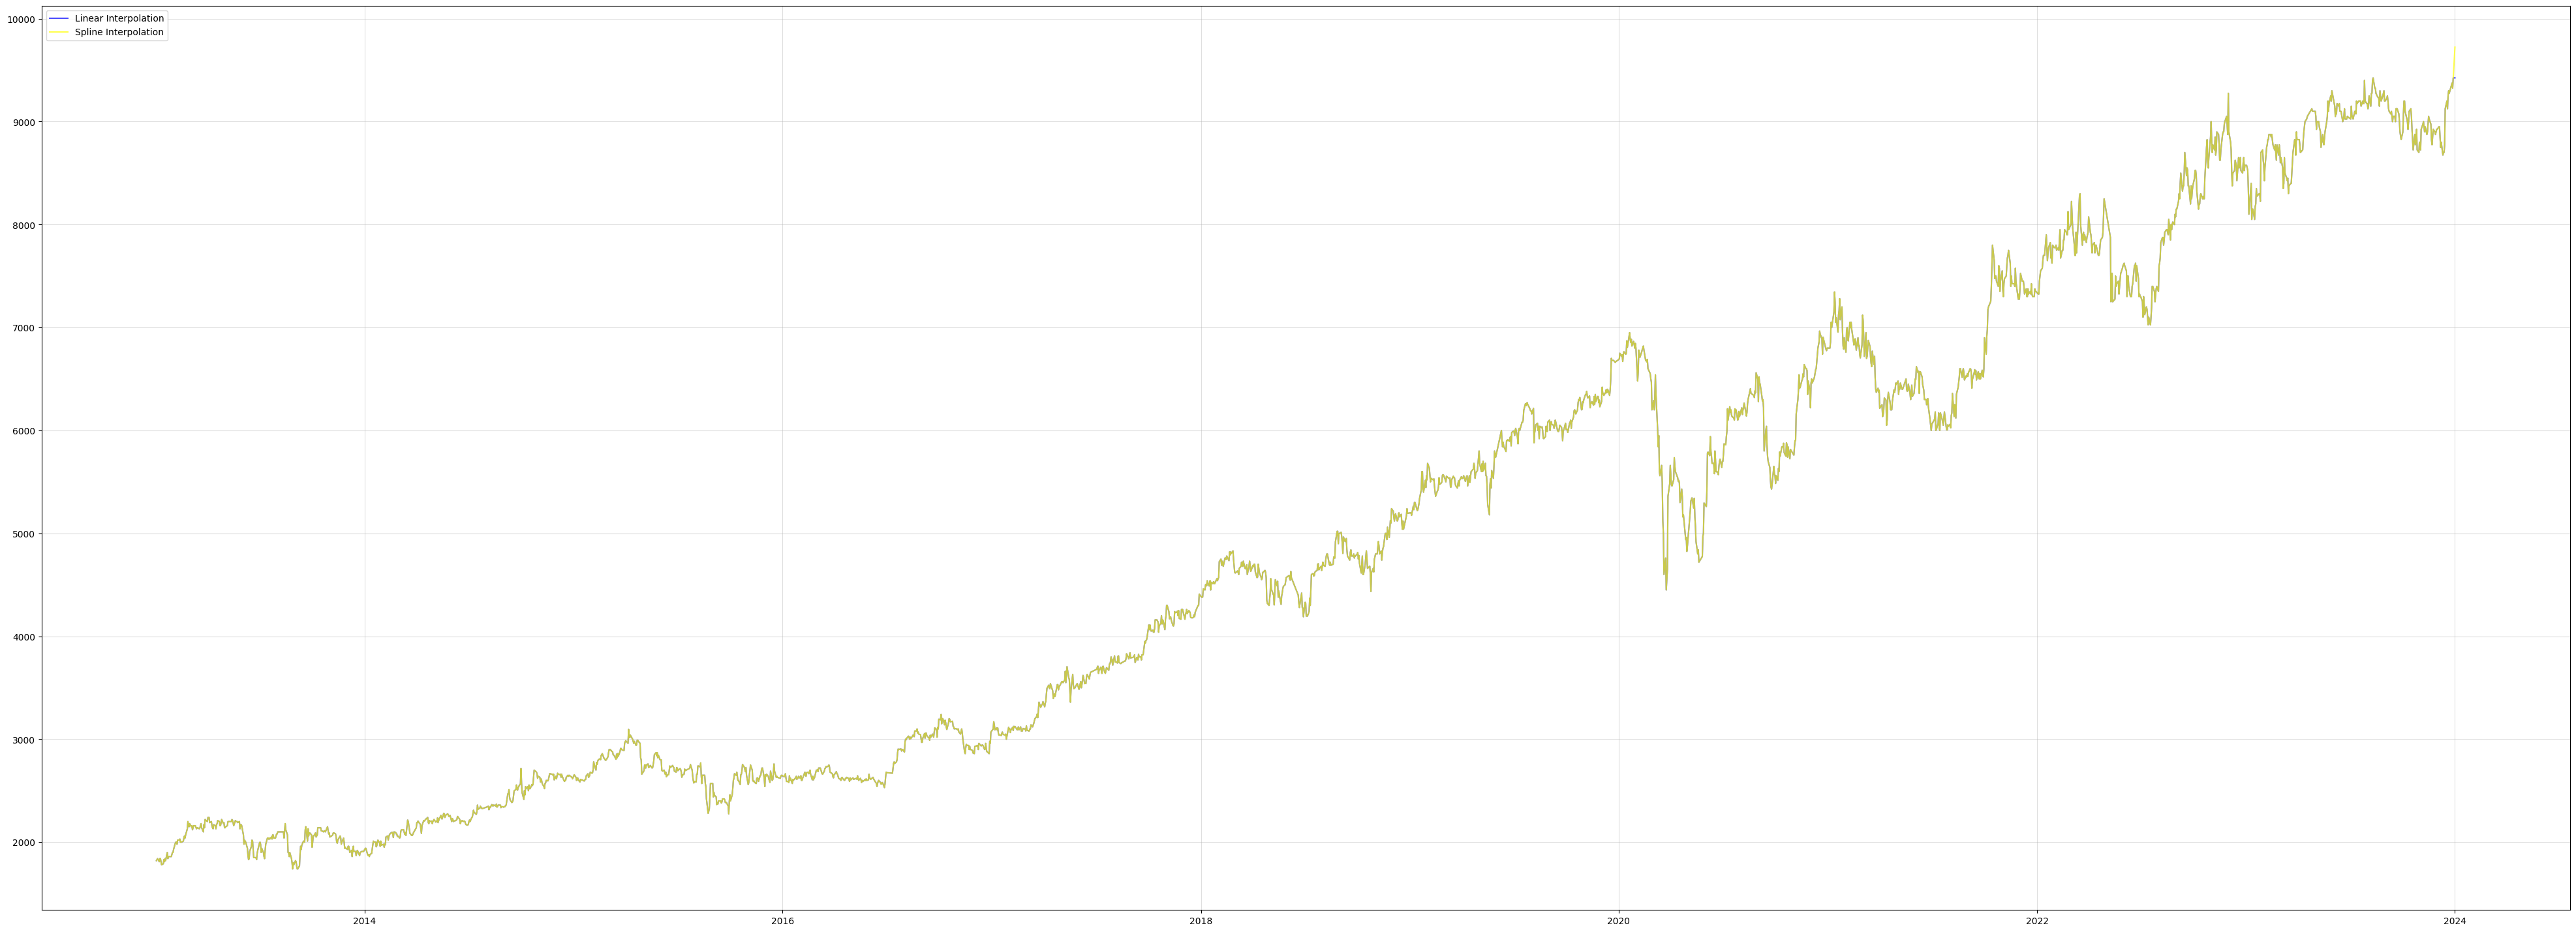

In [133]:
#Comparing linear and spline
fig= plt.figure(figsize=(50,18))

ax= fig.add_subplot(1,1,1)
ax.plot(df_linear, c="blue", label="Linear Interpolation", alpha=0.7)
ax.plot(df_spline, c="yellow", label="Spline Interpolation", alpha=0.7)


ax.legend(loc="upper left")
ax.grid("on", alpha=0.4)

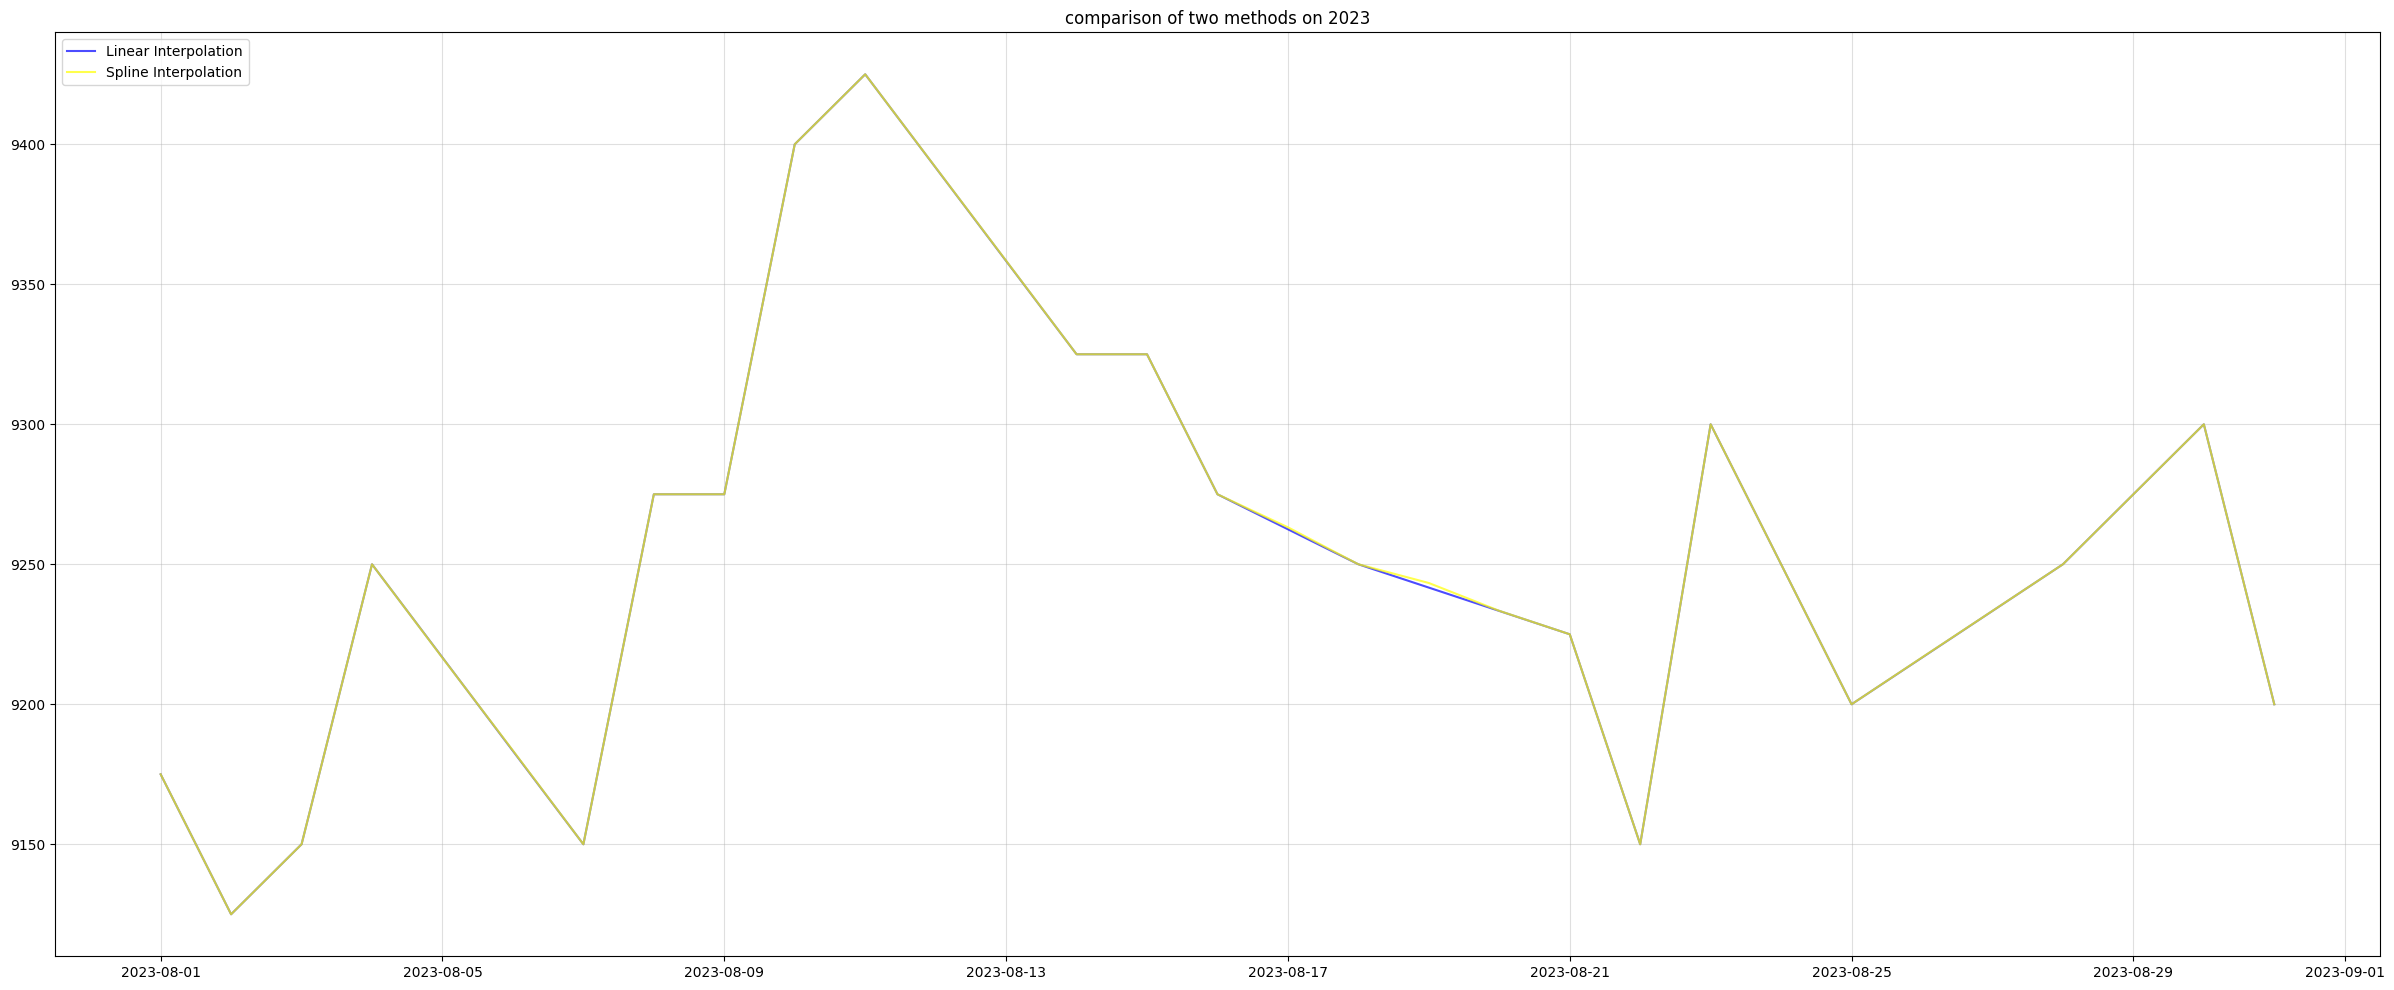

In [112]:
#Zoom in, only check on september 2023

def plotcompare(theyear, themonth):
    fig= plt.figure(figsize=(30,12))

    ax= fig.add_subplot(1,1,1)

    temp=df_linear[df_linear.index.year==theyear]
    temp=temp[temp.index.month==themonth]
    temp
    ax.plot(temp, c="blue", label="Linear Interpolation", alpha=0.7)

    temp=df_spline[df_spline.index.year==theyear]
    temp=temp[temp.index.month==themonth]
    temp
    ax.plot(temp, c="yellow", label="Spline Interpolation", alpha=0.7)

    ax.set_title("comparison of two methods on 2023")
    ax.legend(loc="upper left")
    ax.grid("on", alpha=0.4)
plotcompare(2023, 8)

In [132]:
df_merged=pd.DataFrame(list(zip(df_linear.to_numpy(), df_spline.to_numpy())))
df_merged=pd.concat((df["Open"], df_merged), axis=1)
df_merged.columns=["Original", "Spline", "Linear"]
df_merged.index=pd.to_datetime(df["Date"])

#Save data comparison!
#df_merged.to_csv("../DATA/data_Comparison.csv")

Both linear and spline look similiar! But Spline uses polynomial so i'll just use it i guess!

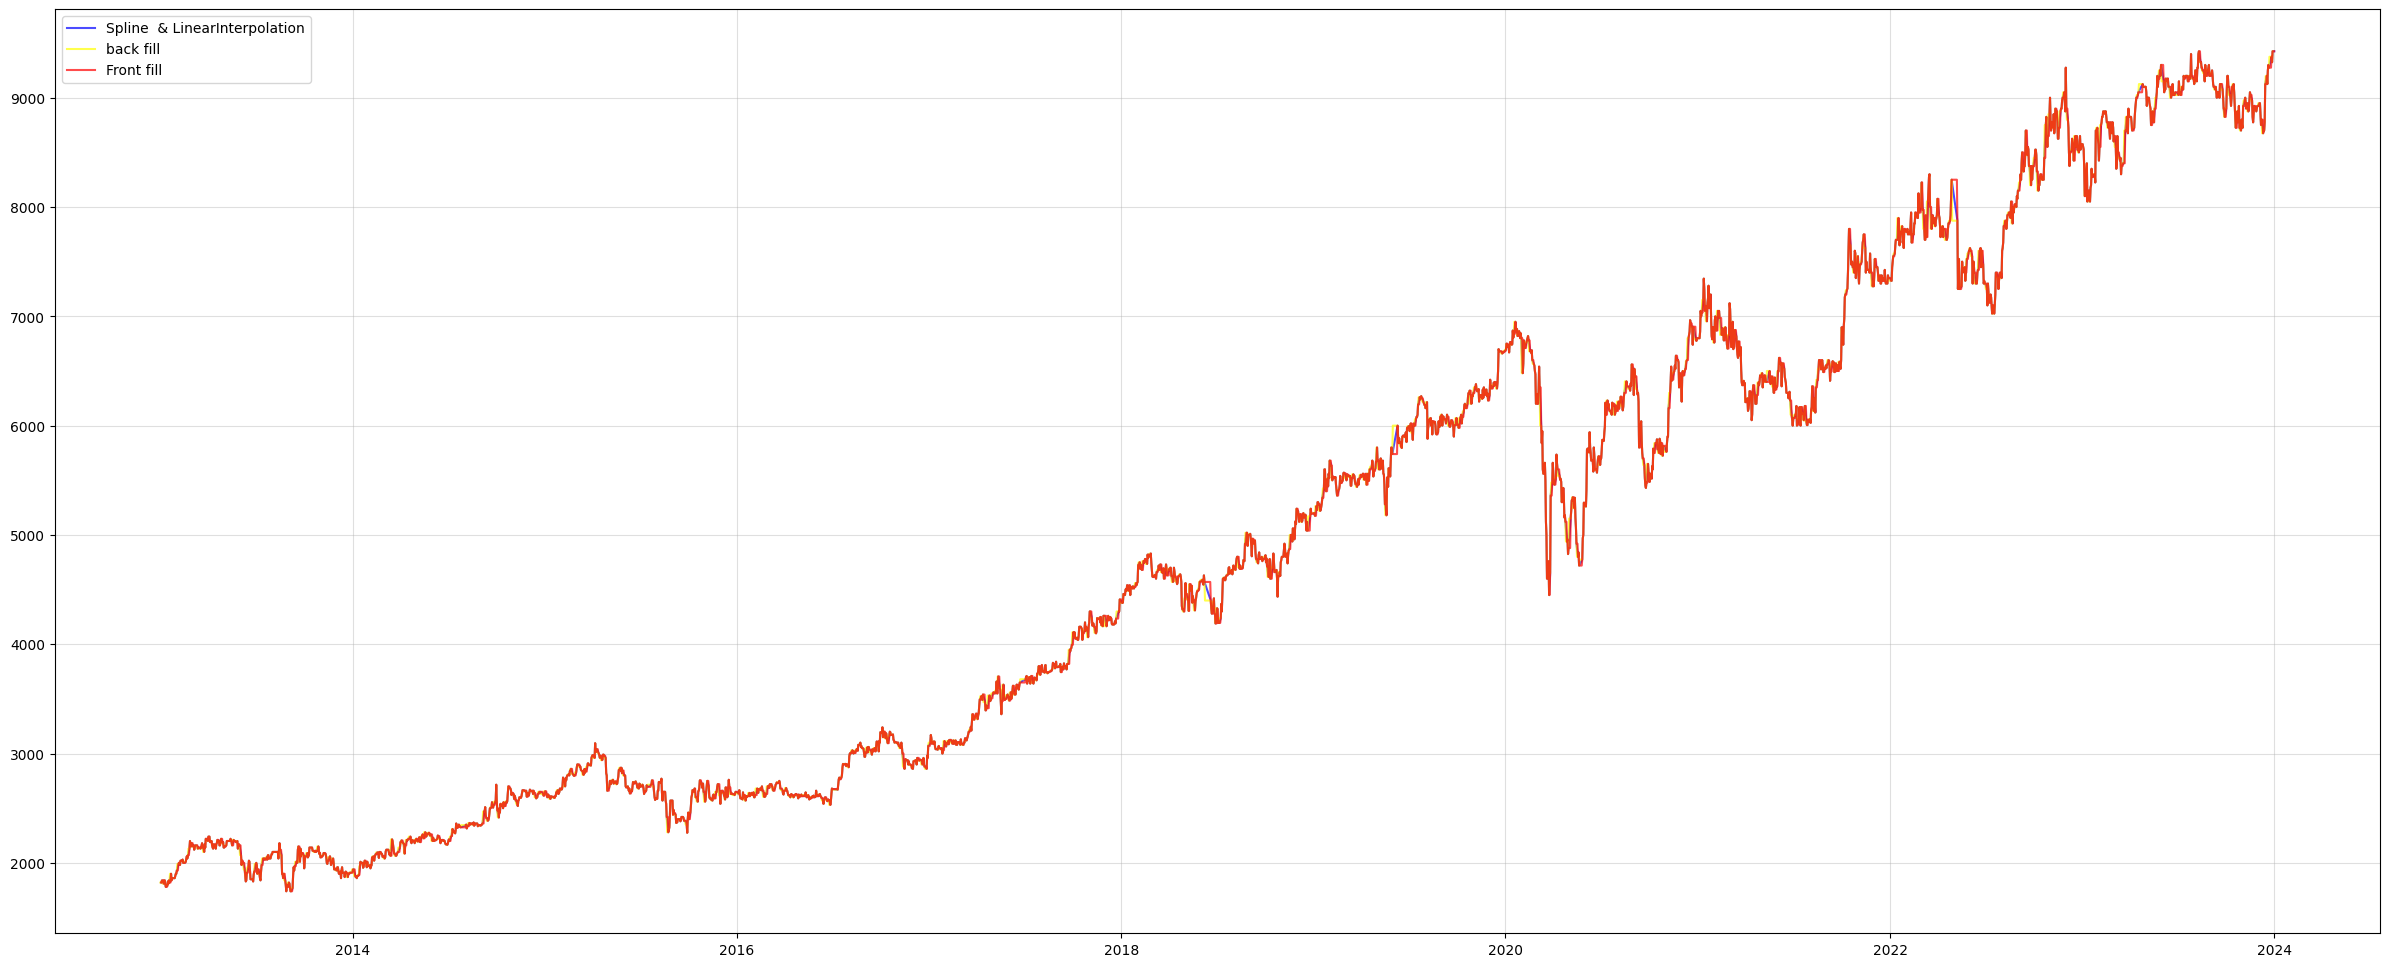

In [23]:
#Comparing linear, bfill, and fronfill

fig= plt.figure(figsize=(30,12))

ax= fig.add_subplot(1,1,1)
ax.plot(df_linear, c="blue", label="Spline  & LinearInterpolation", alpha=0.7)
ax.plot(df_bfill, c="yellow", label="back fill", alpha=0.7)
ax.plot(df_ffill, c="red", label="Front fill", alpha=0.7)


ax.legend(loc="upper left")
ax.grid("on", alpha=0.4)

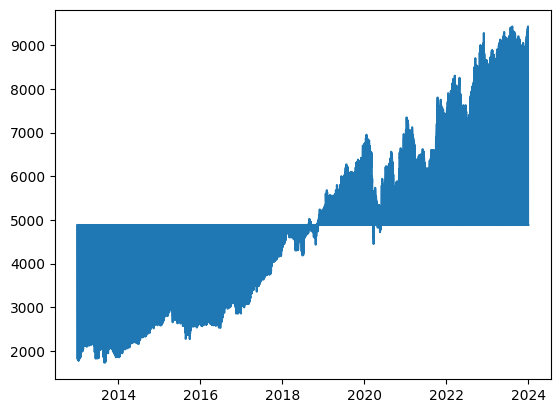

In [307]:
#Don't use mean or med i think ffs
plt.plot(df_meanimpt)

# Conclusion

From the methods above, spline and linear look promising to be used in the dataset. Albeit, comparing both linear and spline. Spline seems to handle missing value in a missing value condition more accurately and more believable

In [135]:
#Save spline data
#df_spline.to_csv("../DATA/data_handling_spline.csv")